In [1]:
import pandas as pd 
from statsmodels.stats.anova import AnovaRM
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
import statsmodels.formula.api as smf
from pingouin import sphericity

In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Marwa\Downloads\student_data.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [13]:
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [15]:
# Check for unique values
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
age: [18 17 15 16 19 22 20 21]
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Medu: [4 1 3 2 0]
Fedu: [4 1 2 3 0]
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
traveltime: [2 1 3 4]
studytime: [2 3 1 4]
failures: [0 3 2 1]
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
famrel: [4 5 3 1 2]
freetime: [3 2 4 1 5]
goout: [4 3 2 1 5]
Dalc: [1 2 5 3 4]
Walc: [1 3 2 4 5]
health: [3 5 1 2 4]
absences: [ 6  4 10  2  0 16 14  7  8 25 12 54 18 26 20 56 24 28  5 13 15 22  3 21
  1 75 30 19  9 11 38 40 23 17]
G1: [ 5  7 15  6 12 16 14 10 13  8 11  9 17 19 18  4  3]
G2: [ 6  5  8 14 10 15 12 18 16 13  9 11  7 19 17  4  0]
G3: [ 6 10 15 11 19  9 12 14 16  5  8 17 18 13 20  7 

In [65]:
# Reshape data into long format
repeated_data = pd.melt(data, id_vars=['sex', 'school', 'studytime'], 
                        value_vars=['G1', 'G2', 'G3'], 
                        var_name='Time', value_name='Score')

print(repeated_data.to_string())

     sex school  studytime Time  Score
0      F     GP          2   G1      5
1      F     GP          2   G1      5
2      F     GP          2   G1      7
3      F     GP          3   G1     15
4      F     GP          2   G1      6
5      M     GP          2   G1     15
6      M     GP          2   G1     12
7      F     GP          2   G1      6
8      M     GP          2   G1     16
9      M     GP          2   G1     14
10     F     GP          2   G1     10
11     F     GP          3   G1     10
12     M     GP          1   G1     14
13     M     GP          2   G1     10
14     M     GP          3   G1     14
15     F     GP          1   G1     14
16     F     GP          3   G1     13
17     F     GP          2   G1      8
18     M     GP          1   G1      6
19     M     GP          1   G1      8
20     M     GP          2   G1     13
21     M     GP          1   G1     12
22     M     GP          2   G1     15
23     M     GP          2   G1     13
24     F     GP          

Perform pairwise comparisons between levels of Time or other variables to identify significant differences.

In [24]:
# Post-hoc analysis for Time
posthoc = pairwise_tukeyhsd(endog=repeated_data['Score'], 
                            groups=repeated_data['Time'], 
                            alpha=0.05)

print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    G1     G2  -0.1949 0.7644 -0.8499   0.46  False
    G1     G3  -0.4937 0.1806 -1.1486 0.1613  False
    G2     G3  -0.2987 0.5327 -0.9537 0.3562  False
---------------------------------------------------


 Profile Analysis
Check if dependent variables (e.g., G1, G2, G3) exhibit similar patterns across levels of independent variables.

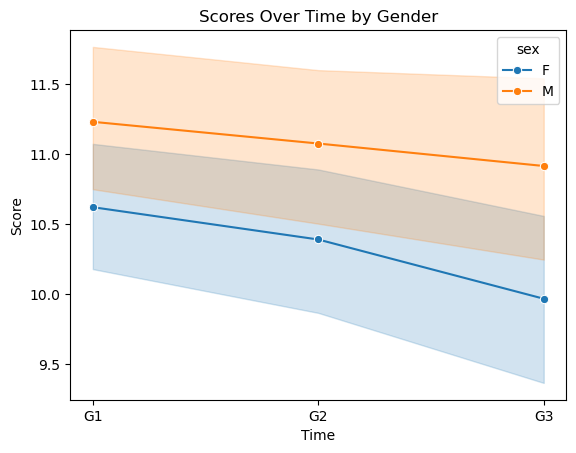

In [27]:
# Lineplot for scores over time by gender
sns.lineplot(data=repeated_data, x='Time', y='Score', hue='sex', marker='o')
plt.title('Scores Over Time by Gender')
plt.show()

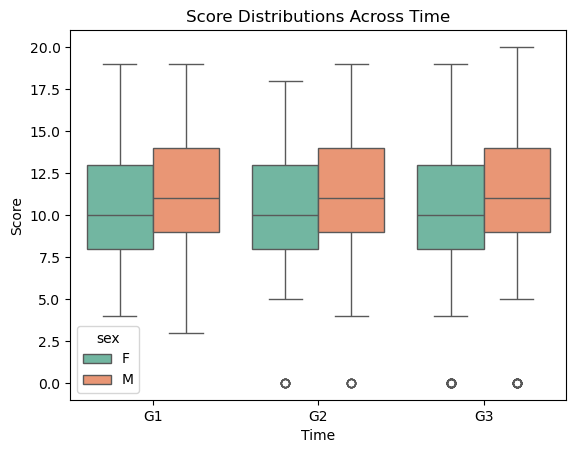

In [29]:
# Boxplot to visualize score distributions over time
sns.boxplot(data=repeated_data, x='Time', y='Score', hue='sex', palette='Set2')
plt.title('Score Distributions Across Time')
plt.show()

In [31]:
# Perform MANOVA with interactions
manova = MANOVA.from_formula('G1 + G2 + G3 ~ sex * studytime', data=data)
manova_results = manova.mv_test()

print(manova_results)

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.6924 3.0000 389.0000 57.5930 0.0000
         Pillai's trace 0.3076 3.0000 389.0000 57.5930 0.0000
 Hotelling-Lawley trace 0.4442 3.0000 389.0000 57.5930 0.0000
    Roy's greatest root 0.4442 3.0000 389.0000 57.5930 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          sex           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9933 3.0000 389.0000  0.8762 0.4534
         Pillai's trace 0.0067 3.0000 389.0000  0.8762 0.4534
 Hotelling-Lawley trace 0.

Separate Within- and Between-Subject Effects

Within-subject effects: Compare repeated measures (e.g., Time effects for G1, G2, G3).
Between-subject effects: Analyze between-group factors separately (e.g., sex, studytime).

In [71]:
# Aggregate data to ensure one observation per subject and cell
aggregated_data = repeated_data.groupby(['school', 'Time', 'sex', 'studytime'], as_index=False).mean()

# Verify the structure
print(aggregated_data.head())

  school Time sex  studytime      Score
0     GP   G1   F          1  10.565217
1     GP   G1   F          2   9.959596
2     GP   G1   F          3  11.477273
3     GP   G1   F          4  11.882353
4     GP   G1   M          1  10.757576


In [37]:
# Run repeated measures MANOVA with automatic aggregation
rm_anova = AnovaRM(data=repeated_data, depvar='Score', subject='school', within=['Time'], 
                   aggregate_func='mean')
rm_results = rm_anova.fit()

print(rm_results)

              Anova
     F Value Num DF Den DF Pr > F
---------------------------------
Time  9.8683 2.0000 2.0000 0.0920



 Include Covariates (ANCOVA or MANCOVA)
Incorporate continuous variables (e.g., studytime, absences) as covariates to control for their influence on dependent variables.

In [40]:
manova_with_covariate = MANOVA.from_formula('G1 + G2 + G3 ~ sex + studytime + absences', data=data)
print(manova_with_covariate.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.5703 3.0000 389.0000 97.6792 0.0000
         Pillai's trace 0.4297 3.0000 389.0000 97.6792 0.0000
 Hotelling-Lawley trace 0.7533 3.0000 389.0000 97.6792 0.0000
    Roy's greatest root 0.7533 3.0000 389.0000 97.6792 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          sex           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9759 3.0000 389.0000  3.2047 0.0232
         Pillai's trace 0.0241 3.0000 389.0000  3.2047 0.0232
 Hotelling-Lawley trace 0.

 Test Homogeneity of Variances
Check whether variances are equal across groups using Levene's test.

In [64]:
from scipy.stats import levene

# Levene's test for equality of variances
levene_test = levene(repeated_data[repeated_data['Time'] == 'G1']['Score'],
                     repeated_data[repeated_data['Time'] == 'G2']['Score'],
                     repeated_data[repeated_data['Time'] == 'G3']['Score'])
print('Levene’s Test:', levene_test)

Levene’s Test: LeveneResult(statistic=6.958197225481981, pvalue=0.0009902487246434177)


C:\Users\Marwa\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


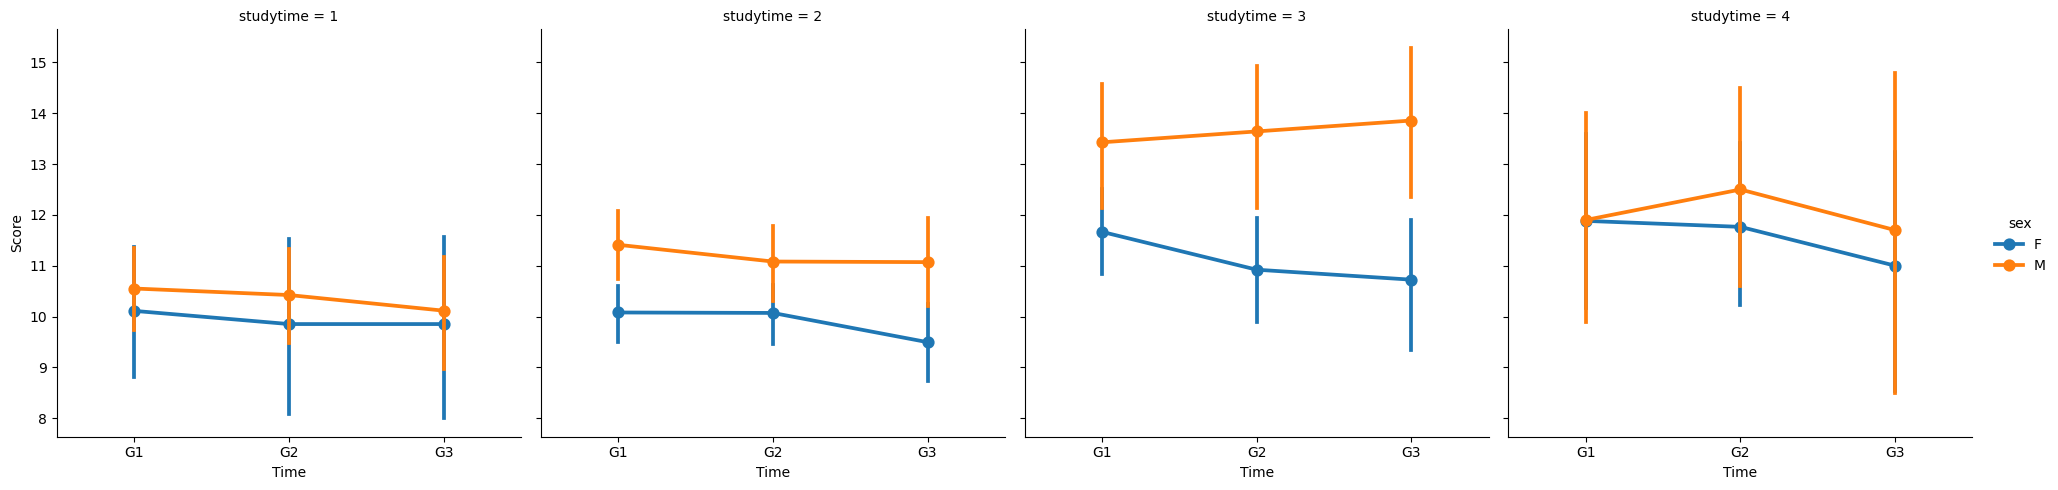

In [71]:
# Interaction plot
sns.catplot(data=repeated_data, x='Time', y='Score', hue='sex', col='studytime', kind='point')
plt.show()

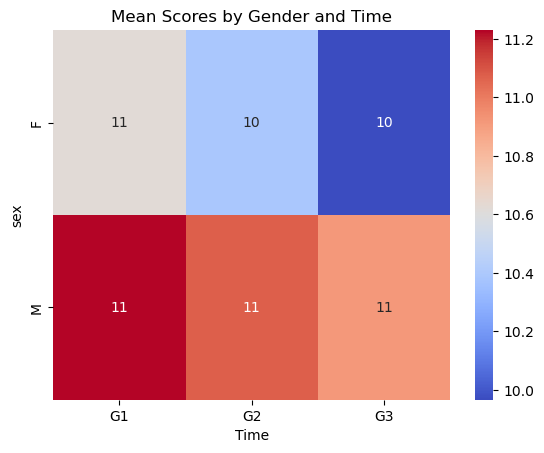

In [73]:
# Create pivot table for mean scores
pivot_data = repeated_data.pivot_table(index='sex', columns='Time', values='Score', aggfunc='mean')

# Heatmap
sns.heatmap(pivot_data, annot=True, cmap='coolwarm')
plt.title('Mean Scores by Gender and Time')
plt.show()